<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 3 / NOTE 2*

---

# 선형대수 2

## 🏆 학습 목표 

- 공분산, 상관계수의 목적과 사용 예시, 차이점을 설명 할 수 있다.
- 벡터의 직교와 그 조건에 대해서 설명 할 수 있다.
- 단위 벡터와, 단위 벡터로의 구분을 설명 할 수 있다.
- span, basis, rank의 내용을 이해 할 수 있다.
- Gaussian elemination의 내용을 이해 할 수 있다.
- linear projection과 예시를 설명 할 수 있다.

---

# Variance

분산은, 데이터가 **얼마나 퍼져있는지**를 측정하는 방법입니다. 

이는 각 값들의 평균으로부터 차이의 제곱 평균입니다. 

즉, 분산을 구하기 위해서는 일반적으로 평균을 먼저 계산하여야 합니다.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# 랜덤한 50개의 정수를 포함하는 2 변수 설정.
variance_one = []
variance_two = []
for x in range(50):
  variance_one.append(random.randint(25,75))
  variance_two.append(random.randint(0,100))
  
variance_data = {'v1': variance_one, 'v2': variance_two}

variance_df = pd.DataFrame(variance_data)
variance_df['zeros'] = pd.Series(list(np.zeros(50)))

variance_df.head()

,v1,v2,zeros
0,52,86,0.0
1,67,21,0.0
2,51,46,0.0
3,54,83,0.0
4,41,25,0.0


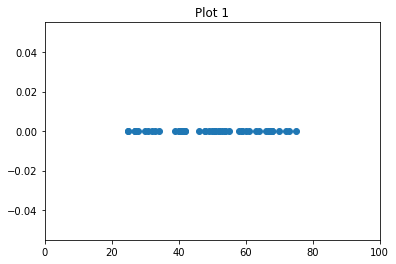

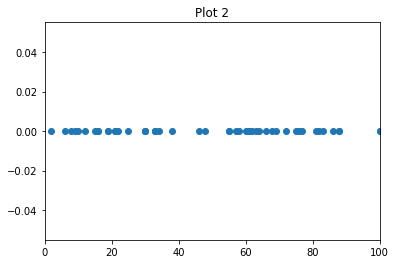

In [ ]:
# scatter plot

plt.scatter(variance_df.v1, variance_df.zeros)
plt.xlim(0,100)
plt.title("Plot 1")
plt.show()

plt.scatter(variance_df.v2, variance_df.zeros)
plt.xlim(0,100)
plt.title("Plot 2")
plt.show()

위의 두 데이터에 대해서, 벌어져있는 정도의 차이를 쉽게 확인 할 수 있습니다. 

그러나 보이는 것 말고 실제 값을 통해서 계산을 해볼까요?

$\overline{X}$ 는 평균, $N$ 은 관측의 수 입니다. (샘플의 수)

$v$ 혹은 분산은 일반적으로 소문자 v로 표기되며 필요에 따라 $\sigma^{2}$로 표기되기도 합니다.

\begin{align}
v = \frac{\sum{(X_{i} - \overline{X})^{2}} }{N}
\end{align}

평균을 계산하는 방법은, 전부 더한 다음 수로 나누는 것입니다. 

그러나 이번 계산에서는 평균을 구하는 것이 아니기 때문에, 값만 더하는 것이 아니라 평균과의 차이의 제곱을 더하게 될 것입니다.

In [ ]:
# 평균
v1_mean = variance_df.v1.mean()
print("v1 mean: ", v1_mean)
v2_mean = variance_df.v2.mean()
print("v2 mean: ", v2_mean)

# 각 데이터로부터 평균까지의 거리

variance_df['v1_distance'] = variance_df.v1-v1_mean
variance_df['v2_distance'] = variance_df.v2-v2_mean

variance_df.head()

v1 mean:  50.06
v2 mean:  47.66


,v1,v2,zeros,v1_distance,v2_distance
0,52,86,0.0,1.94,38.34
1,67,21,0.0,16.94,-26.66
2,51,46,0.0,0.94,-1.66
3,54,83,0.0,3.94,35.34
4,41,25,0.0,-9.06,-22.66


In [ ]:
# 제곱 
variance_df['v1_squared_distance'] = variance_df.v1_distance**2
variance_df['v2_squared_distance'] = variance_df.v2_distance**2

# 제곱을 통해서 음수를 양수로 (거리의 크기) 바꿀 수 있습니다.

variance_df.head()

,v1,v2,zeros,v1_distance,v2_distance,v1_squared_distance,v2_squared_distance
0,52,86,0.0,1.94,38.34,3.7636,1469.9556
1,67,21,0.0,16.94,-26.66,286.9636,710.7556
2,51,46,0.0,0.94,-1.66,0.8836,2.7556
3,54,83,0.0,3.94,35.34,15.5236,1248.9156
4,41,25,0.0,-9.06,-22.66,82.0836,513.4756


In [ ]:
# 더하고 나눔
observations = len(variance_df)
print("Number of Observations: ", observations)

Variance_One = variance_df.v1_squared_distance.sum()/observations
Variance_Two = variance_df.v2_squared_distance.sum()/observations

print("Variance One: ", Variance_One)
print("Variance Two: ", Variance_Two)

Number of Observations:  50
Variance One:  212.17640000000003
Variance Two:  764.3844


위의 계산이 의미하는 바가 무엇일까요? 

랜덤넘버를 생성할때, v1은 `25 ~ 75`까지 `50`의 범위를, v2는 `0 ~ 100`까지 `100` 범위를 바탕으로 **2배** 정도 차이가 나게 생성했지만

그들의 분산의 차이는 **2배보다 훨씬** 더 큽니다. (엄밀히는 4배 정도입니다)

In [ ]:
print("분산의 차이 =", Variance_Two/Variance_One) 

분산의 차이 = 3.6025891663728857


## Variance 쉽게 계산하기

In [ ]:
print(variance_df.v1.var(ddof = 1))
print(variance_df.v2.var(ddof = 1))

216.50653061224492
779.9840816326531


주의할점으로, 위의 결과는 이전에 계산했던 결과와는 조금 다릅니다 그 이유는, 분산을 계산하는 방법이 모집단이냐 혹은 샘플이냐에 따라서 달라지기 때문입니다.

 **모집단의 분산** $\sigma^{2}$ 는 모집단의 **PARAMETER** (aspect, property, attribute, etc)이며,

The **샘플의 분산** $s^{2}$ 는 샘플의 **STATISTIC** (estimated attribute)입니다.

<img src='https://i.imgur.com/YZWGI8e.png' width =400>

복잡한 차이가 있기는 하지만, 샘플 분산 $s^{2}$ 는 모집단 분산 $\sigma^{2}$의 추정치입니다.

일반적으로, **샘플**의 분산을 계산 할때는 $N-1$로 나누어야 합니다. 앞서 우리가 데이터를 통해 계산했던 방식은 **모집단의 분산**입니다.

그렇기 때문에 만약 우리가 자유도를 0 으로 설정하는 경우, 동일한 값을 얻을 수 있습니다.

In [ ]:
print(variance_df.v1.var(ddof = 0))
print(variance_df.v2.var(ddof = 0))

212.17640000000003
764.3844


# Standard Deviation

분산의 의미를 이해했다면, 표준편차는 더 쉽습니다. 

표준편차는 분산의 값에 $\sqrt()$를 씌운 것입니다.



## 분산 / 표준편차

분산을 구하는 과정에서 우리는 더할때 제곱 값들을 더했습니다. 

그렇기 때문에 평균에 비해서 스케일이 커지는 문제가 있는데,  

표준 편차는 이를 해결 하기 위해서 제곱 된 스케일을 낮춘 방법입니다. 

이는 많은 통계분석 프로세스에서 표준편차를 사용하여 계산하는 이유 중 하나입니다.

In [ ]:
print(variance_df.v1.std(ddof=0)) # std 에 주의
print(variance_df.v2.std(ddof=0))

14.566276119859873
27.647502599692437


# Covariance

- Covariance란, 1개의 변수 값이 변화할 때 다른 변수가 어떠한 **연관성을 나타내며 변하는지**를 측정하는 것입니다. 

<https://en.wikipedia.org/wiki/Covariance#Definition>


- 2개의 변수를 사용하기 때문에 그래프를 통해서 보는 것이 이 개념을 이해하는데에 도움을 줄 수 있습니다.

<img src='https://i.imgur.com/VMneXpA.png' width =500>

- 첫번째 그래프의 경우, y의 값이 높을때 x 의 값은 낮습니다. 이는 음의 (negative) 공분산 값을 갖는다 라고 표현합니다.

- 두번째 그래프에서는 양 변수의 높고 낮음에 대하여 관련성을 알 수 없습니다. 그러므로 이러한 형태는 0에 가까운 공분산 값을 갖습니다.
- 마지막 그래프에서, y 값이 낮을때 x의 값도 마찬가지로 낮으며, 높을때는 같이 높아진다는 것을 확인 할 수 있습니다. 이 경우 양 변수간의 공분산 값은 양의 (positive)값을 기대 할 수 있습니다.
<br>
<img src='https://user-images.githubusercontent.com/6457691/89965802-a0d1fa00-dc88-11ea-8bb4-cdef0e7a3b1c.jpg' width = 450>

## 공분산 이해하기

큰 값의 공분산은 두 변수간의 큰 연관성을 나타냅니다. 

그러나, 만약 변수들이 다른 스케일을 가지고 있다면 공분산은 실제 변수의 연관성에 관계 없이 영향을 받게 될 것입니다. 

다시 말하면 만약 두 변수가 연관성이 적더라도 큰 스케일을 가지고 있다면, 연관이 높지만 스케일이 작은 변수들에 비해서 높은 공분산 값을 가지게 될 것입니다. 

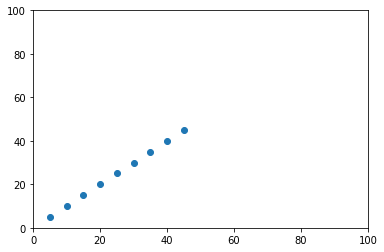

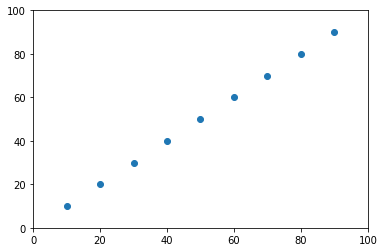

In [ ]:
a = b = np.arange(5, 50, 5)
c = d = np.arange(10,100,10)

fake_data = {"a": a, "b": b, "c": c, "d": d}

df = pd.DataFrame(fake_data)

plt.scatter(df.a, df.b)
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

plt.scatter(df.c, df.d)
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

# Variance-covariance matrix

위 데이터에 대해서 공분산을 계산하기 위한 방법은 다음과 같습니다.

In [ ]:
df.cov()

,a,b,c,d
a,187.5,187.5,375.0,375.0
b,187.5,187.5,375.0,375.0
c,375.0,375.0,750.0,750.0
d,375.0,375.0,750.0,750.0


이러한 matrix를 variance-covariance matrix 라고 표현하며, 
대각선 부분은 **공분산**이 아닌, **분산**을 표현합니다.

앞의 두데이터셋은 동일한 연관성을 갖고 있지만 ($x$ = $y$), 계산된 공분산의 값은 매우 다릅니다.

❓ 이 문제를 어떻게 해결 할 수 있을까요?


# Correlation coefficient

분산에서 스케일을 조정하기 위해 표준편차를 사용했던 것처럼, 

이번에도 공분산의 스케일을 조정할 수 있습니다. 

공분산을 두 변수의 표준편차로 각각 나눠주면 스케일을 조정할 수 있으며 상관계수라고 부릅니다.

상관계수는 -1에서 1까지로 정해진 범위 안의 값만을 갖으며 선형연관성이 없는 경우 0에 근접하게 됩니다. 

대부분의 경우, 상관계수는 공분산에 비해서 **더 좋은** 지표로써 사용되며 이유는 다음과 같습니다

- 공분산은 이론상 모든 값을 가질 수 있지만, 상관계수는 `-1 ~ 1` 사이로 정해져 비교하기가 쉽습니다.
- 공분산은 항상 스케일, 단위를 포함하고 있지만, 상관계수는 이에 영향을 받지 않습니다.
- 상관계수는 데이터의 평균 혹은 분산의 크기에 영향을 받지 않습니다.

<img src='https://i.imgur.com/1amjn9e.png' width = 500>

상관 계수는 일반적으로 소문자 $r$로 표현됩니다.

\begin{align}
cor(X,Y) = r = \frac{cov(X,Y)}{\sigma_{X}\sigma_{Y}} 
\end{align}

위의 데이터를 바탕으로 correlation을 계산해보겠습니다

In [ ]:
df.corr()

,a,b,c,d
a,1.0,1.0,1.0,1.0
b,1.0,1.0,1.0,1.0
c,1.0,1.0,1.0,1.0
d,1.0,1.0,1.0,1.0


상관계수가 1이라는 것은 한 변수가 다른 변수에 대해서 완벽한 양의 선형 관계를 갖고 있다는 것을 의미합니다.

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1200px-Correlation_examples2.svg.png' width = 500>




### 🔥 Spearman correlation

<https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient>

우리가 이전까지 배운, correlation coefficient는 

Pearson correlation.. 이라 부르며 

이는 데이터로부터 **분산** 과 같은 통계치를 계산 할 수 있을때 사용 가능합니다.

그러나 만약 데이터가 numeric이 아니라, categorical 이라면..? 

이를 위해서 우리는 저번 주에 non-parametric에 대한 개념을 배웠습니다.

spearman correlation coefficient 는 값들에 대해서 순서 혹은 rank를 매기고, 그를 바탕으로 correlation을 측정하는 Non-parametric한 방식입니다.

🔥 python 에서 spearman correlation을 계산하는 법을 알아보세요.



# Orthogonality

Orthogonality란, 벡터 혹은 매트릭스가 서로 수직으로 있는 상태를 나타냅니다.



## 이게 AI랑 무슨 관계가 있죠?

- 분산, 공분산, 상관계수는 왜 나온거죠?

다음과 같은 벡터가 있다고 칩시다.

<img src='https://i.imgur.com/JImwF8w.png' width = 500>

이를 시각화하면 아래 그림과 같을 것 입니다.

<img src='https://i.imgur.com/sHPDJ1j.png' width = 500>

좌표상에 있는 거의 모든 벡터는 다른 벡터와 상관이 아주 작게라도 있습니다.

(**하나가 증가할때, 다른 하나도 증가 하는 경향을 파악하는 것이 공분산** 임을 기억하세요)

딱 하나, 수직인 벡터만 상관 관계가 전혀 없다는 것이죠.

데이터가 (벡터가) 선형 관계가 있는 것과 상관 관계가 없는 것이 어떤 의미를 갖는지는 앞으로 차차 알게 될 것입니다.

## 벡터의 orthogonality 확인

임의의 두 벡터의 내적값이 0이라면 서로 수직으로 배치되어 있습니다.

아래의 예시를 참조하도록 하겠습니다:

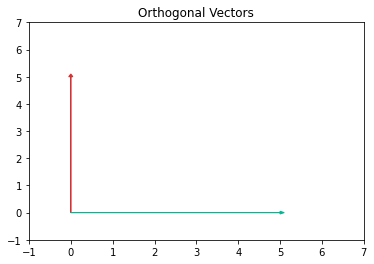

In [ ]:
vector_1 = [0, 5]
vector_2 = [5, 0]

plt.arrow(0, 0, vector_1[0], vector_1[1], head_width = .1, head_length = .1, color ='#d63031')
plt.arrow(0, 0, vector_2[0], vector_2[1], head_width = .1, head_length = .1, color ='#00b894')
plt.xlim(-1, 7)          
plt.ylim(-1, 7)
plt.title("Orthogonal Vectors")
plt.show()

그래프 상에서는 명확하게 벡터들이 서로 수직하다는것을 확인 할 수 있습니다.

\begin{align}
a = \begin{bmatrix} 0 & 5\end{bmatrix}
\qquad
b = \begin{bmatrix} 5 & 0\end{bmatrix}
\\
a \cdot b = (0)(5) + (5)(0) = 0
\end{align}

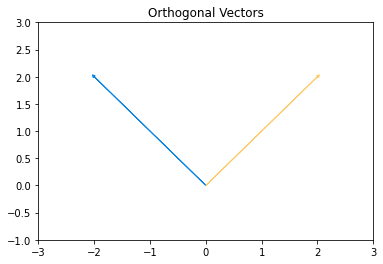

In [ ]:
vector_1 = [-2, 2]
vector_2 = [2, 2]

plt.arrow(0, 0, vector_1[0], vector_1[1], head_width = .05, head_length = .05, color ='#0984e3')
plt.arrow(0, 0, vector_2[0], vector_2[1], head_width = .05, head_length = .05, color ='#fdcb6e')
plt.xlim(-3, 3)          
plt.ylim(-1, 3)
plt.title("Orthogonal Vectors")
plt.show()

마찬가지로, 내적값은 0 입니다.

\begin{align}
a = \begin{bmatrix} -2 & 2\end{bmatrix}
\qquad
b = \begin{bmatrix} 2 & 2\end{bmatrix}
\\
a \cdot b = (-2)(2) + (2)(2) = 0
\end{align}


# 단위 벡터 ( Unit Vectors )

선형대수에서, 단위 벡터란 "단위 길이(1)"를 갖는 모든 벡터를 말합니다. 

$v$ = [1, 2, 2]

||$v$|| = $\sqrt{1^2 + 2^2 + 2^2}$ = 3

$\hat{v}$ = 1 / ||$v$|| $\cdot$ $v$ 

= $1 \over 3$ $\cdot$ [1, 2, 2] = [$1 \over 3$, $2 \over 3$, $2 \over 3$]

||$\hat{v}$|| = 1

---

아래는 각각 1, 2, 3차원의 단위 벡터 입니다.

$\mathbb{R}$ unit vector: $\hat{i} = \begin{bmatrix} 1 \end{bmatrix}$

$\mathbb{R}^2$ unit vectors: $\hat{i} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$, $\hat{j} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$

$\mathbb{R}^3$ unit vectors: $\hat{i} = \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}$, $\hat{j} = \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix}$,  $\hat{k} = \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}$

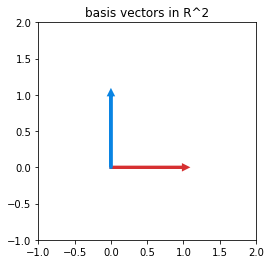

In [ ]:
# 축 설정

plt.xlim(-1,2)          
plt.ylim(-1,2)

# 단위 벡터
i_hat = [1,0]
j_hat = [0,1]

# 축 고정 
plt.gca().set_aspect('equal')

# 벡터 그리기
plt.arrow(0, 0, i_hat[0], i_hat[1], linewidth = 3, head_width = .05, head_length = .05, color = '#d63031')
plt.arrow(0, 0, j_hat[0], j_hat[1], linewidth = 3, head_width = .05, head_length = .05, color = '#0984e3')
plt.title("basis vectors in R^2")
plt.show()

## 벡터를 단위 벡터의 조합으로 표기

모든 벡터 ( 혹은 매트릭스 )는 단위 벡터의 선형 조합으로 표기 됩니다. 

v = [5, 30]

  = [1, 0] * 5 + [0, 1] * 30 

  = 5 $\cdot$ $\hat{i}$ + 30 $\cdot$ $\hat{j}$

위의 예시처럼, $\mathbb{R}^2$내에 있는 임의의 벡터를 단위 벡터의 조합으로 표기 할 수 있습니다. 

# Span

Span 이란, 주어진 두 벡터의 (합이나 차와 같은) 조합으로 만들 수 있는 모든 가능한 벡터의 집합입니다. (방금 위에서 했던 것처럼)



## 선형 관계의 벡터 (Linearly Dependent Vector)

만약 두 벡터가 같은 선상에 있는 경우, 이 벡터들은 선형 관계에 있다고 표현합니다. 즉, 이 두 벡터들은 조합을 통해서 *선 외부의* 새로운 벡터를 생성 할 수 없습니다. 

이러한 벡터의 span은, 평면 공간이 아닌, 벡터가 이미 올려져 있는 **선**으로 제한 됩니다. 

아래의 예시를 참조하세요.

- ❓ 같은 선상에 있다는 것을 수학적으로 어떻게 표현 할까요?



## 선형 관계가 없는 벡터 (Linearly Independent Vectors)

반대로 같은 선상에 있지 않은 벡터들은 선형적으로 독립되어 있다고 표현하며, 

주어진 공간 (2개의 벡터의 경우 $\mathbb{R}^2$ 평면)의 모든 벡터를 조합을 통해 만들어 낼 수 있습니다.

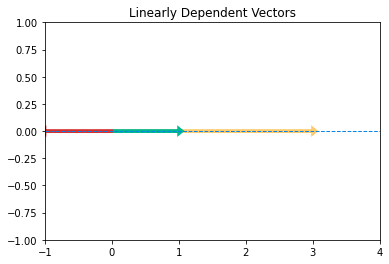

In [ ]:
plt.xlim(-1, 4)          
plt.ylim(-1, 1)

# 원 벡터 (초록)
v = [1,0] 

# 선형관계의 벡터
v2 = np.multiply(3, v) # (노랑)
v3 = np.multiply(-1, v) # (빨강)

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0 * x_vals

plt.plot(x_vals, y_vals, '--', color = '#0984e3', linewidth = 1) # span 선 (파랑)
plt.arrow(0, 0, v2[0], v2[1], linewidth = 3, head_width = .05, head_length = .05, color = '#fdcb6e')
plt.arrow(0, 0, v[0], v[1], linewidth = 3, head_width = .05, head_length = .05, color = '#00b894')
plt.arrow(0, 0, v3[0], v3[1], linewidth = 3, head_width = .05, head_length = .05, color = '#d63031')

plt.title("Linearly Dependent Vectors")
plt.show()

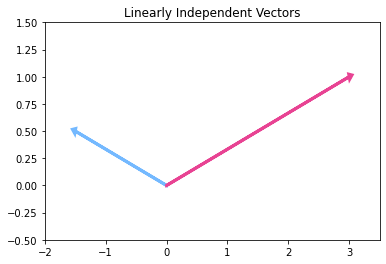

In [ ]:
# 선형 관계에 있지 않은 벡터

plt.xlim(-2, 3.5)
plt.ylim(-.5, 1.5)

a = [-1.5, .5]
b = [3, 1]
plt.arrow(0, 0, a[0], a[1], linewidth = 3, head_width = .05, head_length = .05, color = '#74b9ff')
plt.arrow(0, 0, b[0], b[1], linewidth = 3, head_width = .05, head_length = .05, color = '#e84393')

plt.title("Linearly Independent Vectors")
plt.show()

# Basis

벡터 공간 $V$의 basis 는, $V$ 라는 공간을 채울 수 있는 선형 관계에 있지 않은 벡터들의 모음입니다. ( span 의 역개념 )

예를 들어, 위의 그림에서 2개의 벡터 (빨강, 파랑)는 벡터 공간 $\mathbb{R}^2$ 의 basis 입니다.

## Orthogonal Basis

Orthogonal Basis란, Basis 에 추가로 Orthogonal 한 조건이 붙는, 즉 주어진 공간을 채울 수 있는 **서로 수직인** 벡터들입니다.

## Orthonormal Basis

Orthonomal Basis란, Orthogonal Basis에 추가로 Normalized 조건이 붙은 것으로, **길이가 서로 1인** 벡터들입니다.

추가로, Gram-Schmidt 프로세스 (주어진 벡터들을 Orthonormal하게 수정하는 과정)에 대해서 알아봐도 좋습니다.

<img src='https://i.imgur.com/YSWgVKw.png' width = 500>

## ❓ $\mathbb{R}^2$ 의 R은 무슨 의미 일까요?


# Rank

- 매트릭스의 rank란, 매트릭스의 열을 이루고 있는 벡터들로 만들 수 있는 (span) 공간의 차원입니다. 

- 매트릭스의 차원과는 다를 수도 있으며 그 이유는 행과 열을 이루고 있는 벡터들 가운데 서로 선형 관계가 있을 수도 있기 때문입니다. 

- 이 Rank를 확인 하는 방법은 여러가지 가 있지만, 그중 하나인 Gaussian Elimination을 통해 알아보도록 하겠습니다.


## Gaussian Elimination 

Gaussian Elimination 은 주어진 매트릭스를 "Row-Echelon form"으로 바꾸는 계산과정입니다. 

여기서 "Row-Echelon form"이란, 각 행에 대해서 왼쪽에 1, 그 이후 부분은 0으로 이뤄진 형태입니다. 

(예시를 참조하세요) 

이러한 매트릭스는 일반적으로 upper-triangular 의 형태를 가지고 있습니다. 

<img src='https://i.imgur.com/12BKe72.png' width = 400>

---

\begin{align}
 P = \begin{bmatrix}
  1 & 1 & 3 \\
  0 & 1 & 2 \\
  2 & 1 & 4 
 \end{bmatrix}
\end{align}

3행을 1행*2 로 뺌.

\begin{align}
 P = \begin{bmatrix}
  1 & 1 & 3 \\
  0 & 1 & 2 \\
  0 & -1 & -2 
 \end{bmatrix}
\end{align}

3행을 2행으로 더함

\begin{align}
 P = \begin{bmatrix}
  1 & 1 & 3 \\
  0 & 1 & 2 \\
  0 & 0 & 0 
 \end{bmatrix}
\end{align}

** 맨 마지막 줄이 0, 0, 0이다** 라는 것은 3개의 행이, 선형 관계가 있다는 의미입니다.

(다른 행들의 스칼라 곱과 합으로 표현됨) 

$r_3$ = $2 \cdot\ r_1$ - $1 \cdot\ r_2$

$y$ = $a \cdot\ x + b$

---

처음에 주어졌던 매트릭스

\begin{align}
 P = \begin{bmatrix}
  1 & 1 & 3 \\
  0 & 1 & 2 \\
  2 & 1 & 4 
 \end{bmatrix}
\end{align}

의 Rank 는 2이며 이는 3x3 매트릭스 이지만 $\mathbb{R}^{3}$ 공간이 아닌 $\mathbb{R}^{2}$ 만을 벡터들로 만들어 낼 수 있음을 의미합니다. 


# ($\mathbb{R}^{2}$ 공간에서의) Linear Projections

<img src='https://i.imgur.com/YMmzO65.png'>

---



## Python 으로 과정 구현하기

$\mathbb{R}^{2}$ 공간의 임의의 선 $L$을 가정하겠습니다.

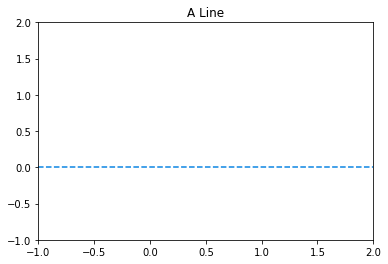

In [ ]:
plt.xlim(-1, 2)
plt.ylim(-1, 2)
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0 * x_vals
plt.plot(x_vals, y_vals, '--', color = '#0984e3')
plt.title("A Line")
plt.show()

임의의 벡터 $v$가 선 위에 있는 경우, $v$는 아무리 스케일을 변화시켜도 결국 선 위에 있다는 것을 알고 있습니다.

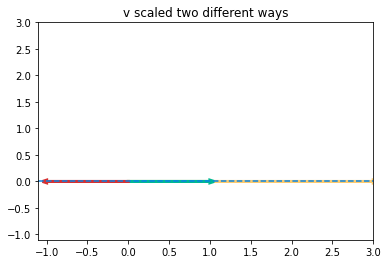

In [ ]:
plt.xlim(-1.1, 3)          
plt.ylim(-1.1, 3)

v = [1, 0] 

v2 = np.multiply(3, v)
v3 = np.multiply(-1, v)

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0 * x_vals

plt.plot(x_vals, y_vals, '--', color = '#0984e3')


plt.arrow(0, 0, v2[0], v2[1], linewidth = 3, head_width = .05, head_length = .05, color = '#fdcb6e')

plt.arrow(0, 0, v[0], v[1], linewidth = 3, head_width = .05, head_length = .05, color = '#00b894')
#### v2 다음 v를 그리는 이유는 뭘까요??


plt.arrow(0, 0, v3[0], v3[1], linewidth = 3, head_width = .05, head_length = .05, color = '#d63031')

plt.title("v scaled two different ways")
plt.show()

녹색 벡터를 $v$ 라고 부르겠습니다. 

처음에 주어진 선 $L$은 $\mathbb{R}$ 공간내의 모든 $v$와 동일합니다. 

이를 식으로 표현 하면, 

\begin{align}
L = cv
\end{align}

로 표현 할 수 있을 것입니다.

이번에는 L위에 "Project" (투사) 하기 위한 새로운 $w$라는 벡터를 추가해보도록 하겠습니다.

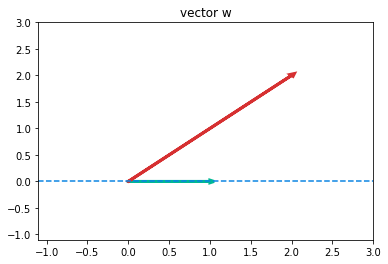

In [ ]:
plt.xlim(-1.1, 3)          
plt.ylim(-1.1, 3)

v = [1, 0] 
w = [2, 2]

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0 * x_vals

plt.plot(x_vals, y_vals, '--', color = '#0984e3')
plt.arrow(0, 0, v[0], v[1], linewidth = 3, head_width = .05, head_length = .05, color = '#00b894')
plt.arrow(0, 0, w[0], w[1], linewidth = 3, head_width = .05, head_length = .05, color = '#d63031')

plt.title("vector w")
plt.show()

## Notation

Projection을 표기하는 방법은 다음과 같습니다.

\begin{align}proj_{L}(\vec{w})\end{align}

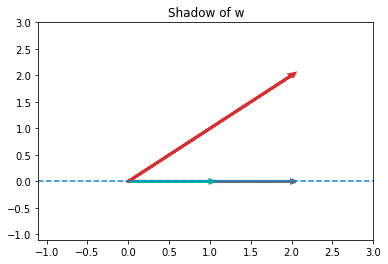

In [ ]:
plt.xlim(-1.1, 3)
plt.ylim(-1.1, 3)

v = [1, 0] 
w = [2, 2]
proj = [2, 0]

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0 * x_vals

plt.plot(x_vals, y_vals, '--', color = '#0984e3')
plt.arrow(0, 0, proj[0], proj[1], linewidth = 3, head_width = .05, head_length = .05, color = '#636e72')
plt.arrow(0, 0, v[0], v[1], linewidth = 3, head_width = .05, head_length = .05, color = '#00b894')
plt.arrow(0, 0, w[0], w[1], linewidth = 3, head_width = .05, head_length = .05, color = '#d63031')

plt.title("Shadow of w")
plt.show()

위 그림에서 회색 벡터는 ($proj_{L}(w)$) 빨간 벡터의 ($w$) 녹색 벡터에 ($L$) 대한 projection 이며, 녹색 벡터를 기준으로 표기 될 수 있습니다.

\begin{align}
cv = proj_{L}(w)
\end{align}

그러나 만약 $L$이 x축과 평행하지 않은 조금더 복잡한 상황일 경우 어떻게 계산하여야 할까요?

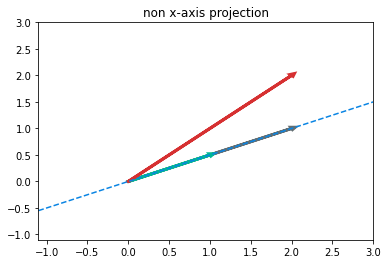

In [ ]:
plt.xlim(-1.1, 3)          
plt.ylim(-1.1, 3)

v = [1, 1/2] 
w = [2, 2]
proj = np.multiply(2, v)

axes.set_aspect('equal')

x_vals = np.array(axes.get_xlim())
y_vals = 1/2 * x_vals

plt.plot(x_vals, y_vals, '--', color = '#0984e3')
plt.arrow(0, 0, proj[0], proj[1], linewidth = 3, head_width = .05, head_length = .05, color = '#636e72')
plt.arrow(0, 0, v[0], v[1], linewidth = 3, head_width = .05, head_length = .05, color = '#00b894')
plt.arrow(0, 0, w[0], w[1], linewidth = 3, head_width = .05, head_length = .05, color = '#d63031')

plt.title("non x-axis projection")
plt.show()

그림을 통해서는 위처럼, 표기 할 수 있을 것입니다. 이후 단계에서는 자세한 계산을 해보도록 하겠습니다.

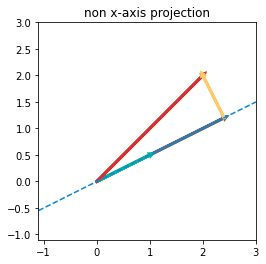

In [ ]:
plt.xlim(-1.1, 3)          
plt.ylim(-1.1, 3)

v = [1, 1/2] 
w = [2, 2]
proj = np.multiply(2.4, v)
x_minus_proj = w - proj

plt.gca().set_aspect('equal')

x_vals = np.array(axes.get_xlim())
y_vals = 1/2 * x_vals

plt.plot(x_vals, y_vals, '--', color = '#0984e3')
plt.arrow(0, 0, proj[0], proj[1], linewidth = 3, head_width = .05, head_length = .05, color = '#636e72')
plt.arrow(0, 0, v[0], v[1], linewidth = 3, head_width = .05, head_length = .05, color = '#00b894')
plt.arrow(0, 0, w[0], w[1], linewidth = 3, head_width = .05, head_length = .05, color = '#d63031')
plt.arrow(proj[0], proj[1], x_minus_proj[0], x_minus_proj[1], linewidth = 3, head_width = .05, head_length = .05, color = '#fdcb6e')

plt.title("non x-axis projection")
plt.show()

$L$과 Orthogonal 한 노란 벡터를 사용해서 계산을 할건데요, 이는 projection $L$에서 시작해서 $w$로 도착하는 벡터입니다.

벡터의 합과 차를 기억한다면, 회색 벡터 + 노란 벡터는 빨간 벡터가 된다는 것을 알 수 있습니다.

즉, 노란 벡터는 빨간 벡터에서 회색 벡터를 뺀 것과 동일한 내용입니다. 이를 식으로 표현하면 다음과 같습니다. $w-proj_{L}(w)$

이전에 L (회색) 에 대한 w (빨강) 의 projection을 cv (녹색 * 스칼라)로 표기 했었는데요, 

노란 벡터는 빨간 벡터에서 회색 벡터를 뺀것과 동일하다는 것을 방금 확인 했는데요, 이는 $w - cv$의 형태로 표기 될 수 있습니다.

한가지 더, 회색(녹색도 마찬가지)과 노란색은 서로 수직 상태에 있기 때문에 두 벡터의 내적값은 0 이 나오게 됩니다.

즉, 회색 $\cdot$ 노란색 = 0.이며 

\begin{align}
v \cdot (w-cv) = 0
\end{align}

라는 식을 얻어 낼 수 있습니다.

위 식을 풀게 되면

\begin{align}
v \cdot w - c(v \cdot v) = 0
\end{align} 

\begin{align}
v \cdot w = c(v \cdot v)
\end{align} 

\begin{align}
c = \frac{w \cdot v}{v \cdot v}
\end{align}

로 바꿀 수 있으며, $cv = proj_{L}(w)$이므로 양변에 $v$를 곱하여

\begin{align}
proj_{L}(w) =  \frac{w \cdot v}{v \cdot v}v
\end{align}

라는 최종 식을 얻어 낼 수 있습니다. 

# Linear Projection은 왜 공부하는 걸까요?

<img src='https://i.imgur.com/zCIaU1W.png'>
